# Deskripsi Proyek
Nasabah Bank Beta pergi meninggalkan perusahaan: sedikit demi sedikit, jumlah mereka berkurang setiap bulannya. Para pegawai bank menyadari bahwa akan lebih menghemat biaya jika perusahaan fokus untuk mempertahankan nasabah lama mereka yang setia daripada menarik nasabah baru.

Pada kasus ini, tugas kita adalah untuk memprediksi apakah seorang nasabah akan segera meninggalkan bank atau tidak. Kamu memiliki data terkait perilaku para klien di masa lalu dan riwayat pemutusan kontrak mereka dengan bank.
Buat sebuah model dengan skor F1 semaksimal mungkin. Untuk bisa dinyatakan lulus dari peninjauan, kamu memerlukan skor F1 minimal 0,59 untuk test dataset.

Setelah itu, kamu akan membuat perubahan yang diperlukan pada pekerjaanmu dan mengirimkannya kembali untuk tinjauan kedua.
Selain itu, ukur metrik AUC-ROC dan bandingkan metrik tersebut dengan skor F1.

In [1]:
# Memuat Librari yang diperlukan 

#data prep
import pandas as pd, numpy as np

#data viz
import matplotlib.pyplot as plt, seaborn as sns

#skylearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score


# Data Statistic
from scipy.stats import chi2_contingency

## Pra-process data

In [2]:
# Memuat data
try:
    data = pd.read_csv ('/datasets/Churn.csv')
except:
    data = pd.read_csv ('Churn.csv')

In [3]:
# Melihat isi data
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<b>Deskripsi data</b>

RowNumber — indeks string data

CustomerId — ID pelanggan

Surname — nama belakang

CreditScore — skor kredit

Geography — negara domisili

Gender — gender

Age — umur

Tenure — jangka waktu jatuh tempo untuk deposito tetap nasabah (tahun)

Balance — saldo rekening

NumOfProducts — jumlah produk bank yang digunakan oleh nasabah

HasCrCard — apakah nasabah memiliki kartu kredit (1 - jika ya; 0 - jika tidak)

IsActiveMember — tingkat keaktifan nasabah (1 - jika ya; 0 - jika tidak)

EstimatedSalary — estimasi gaji

Target =

Exited — apakah nasabah telah berhenti (1 - jika ya; 0 - jika tidak)


## Data Exploration

In [4]:
# Melakukan pengecekan informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
# Melakukan pengecekan isi data tabel "Tenure"
data['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

<pre><b>Mini-Conclusion</b>

<b>RowNumber</b> — is Ok
<b>CustomerId</b> — is OK
<b>Surname</b> — is Ok 
<b>CreditScore</b> — is OK
<b>Geography</b> — is OK
<b>Gender</b> — is OK
<b>Age</b> — is OK

<b>Tenure</b> — memiliki <b>data yang hilang sebanyak 909</b>, Perlu dilakukan aksi atas nilai yang kosong.

<b>Balance</b> — is OK
<b>NumOfProducts</b> — is OK
<b>HasCrCard</b> — is OK
<b>IsActiveMember</b> — is OK
<b>EstimatedSalary</b> — is OK
<b>Exited</b> — is OK

</pre>

## Quality data

In [6]:
# Melakukan pengecekan isi data tabel "Tenure"
data['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [7]:
# Melakukan filter data kolom Tenure tanpa ada data yang hilang
data_nan_tenure = data.loc[~(data['Tenure'].isna())]

In [8]:
# Mendapatkan Nilai tengah dari kolom Tenure yang telah di filter
data_nan_tenure_mean = data_nan_tenure['Tenure'].median()
data_nan_tenure_mean

5.0

<div class="alert-info">
<b>Note</b>

Data yang hilang pada kolom Tenure akan diisi oleh nilai median

    
    

</div>

In [9]:
# Mengisi data yang hilang menjadi nilai media
data['Tenure'].fillna(value=data_nan_tenure_mean, inplace=True)

## Exploratory Data Analyst

### Apakah ada pengaruh terhadap Skor Kredit dengan nasabah yang berhenti?

In [10]:
# Memisahkan data yang nasabah yang berhenti dan tidak
data['exited_str'] = data['Exited']
data.loc[(data['Exited'] == 1), 'exited_str'] = 'exit'
data.loc[(data['Exited'] == 0), 'exited_str'] = 'stay'

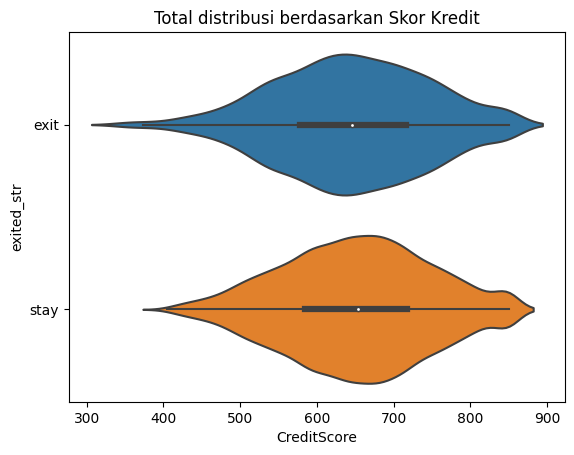

In [11]:
# Melihat distribusi CreditScore terhadap  yang keluar atau bertahan
sns.violinplot(data=data, x='CreditScore', y='exited_str')
plt.title('Total distribusi berdasarkan Skor Kredit')
plt.show()

In [12]:
# Mendapatkan nilai rata-rata, varian dan standar deviasi berdasarkan Skor Kredit
data.pivot_table(index='exited_str', values='CreditScore', aggfunc=[np.mean, np.var, np.std])

,mean,var,std
,CreditScore,CreditScore,CreditScore
exited_str,,,
exit,645.351497,10064.403894,100.321503
stay,651.853196,9149.656542,95.653837


<div class="alert-info">
<b>INSIGHT</b>


- Tidak terdapat perbedaan yang signifikan antara Skor Kredit dengan pelanggan yang berhenti ataupun masuk.

Sehingga dapat disimpulkan bahwa Tidak terdapat pengaruh Skor Kredit yang kecil ataupun besar terhadap pelanggan yang berhenti ataupun masuk. 
    
    

</div>

### Bagaimana data nasabah yang berhenti di masing-masing negara

In [13]:
# Melakukan pengecekan isi data tabel "Tenure"
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
# Mendapatkan nilai rata-rata, varian dan standar deviasi berdasarkan Skor Kredit
country = pd.pivot_table(data=data, index='Geography', columns='exited_str', values='CustomerId', aggfunc='count')

In [15]:
country

exited_str,exit,stay
Geography,,
France,810,4204
Germany,814,1695
Spain,413,2064


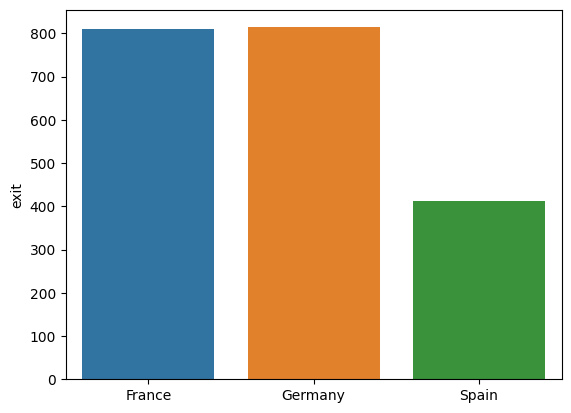

In [16]:
sns.barplot(data=country, x = ['France','Germany','Spain'], y = 'exit')
plt.show()

<div class="alert-info">
<b>Note</b>

    
- Negara Spanyol Merupakan negara yang dimana pelanggan berhenti lebih sedikit 2x lipat dari Prancis dan Jerman
    
    

</div>

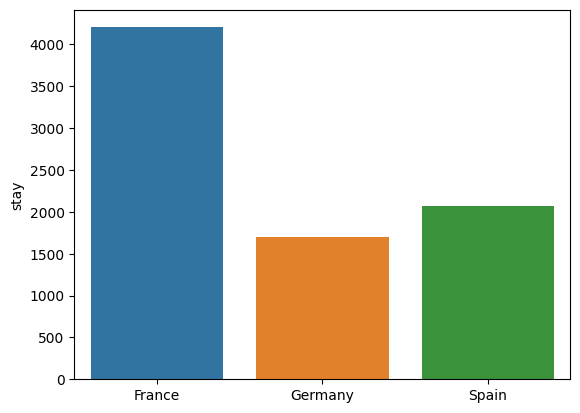

In [17]:
sns.barplot(data=country, x = ['France','Germany','Spain'], y = 'stay')
plt.show()

In [18]:
geo_exit = pd.pivot_table(data=data, index='Geography', columns='exited_str', values='CustomerId', aggfunc='count')

<div class="alert-info">
<b>Note</b>

    
- Negara Prancis Merupakan negara yang dimana pelanggan bertahan paling banyak diantara Jerman dan Spanyol
    
    

</div>

In [19]:
p_value = chi2_contingency(geo_exit)[1]
alpha = 0.05
print('P-Value:', p_value)
if p_value > alpha:
    print('H0: Tidak ada hubungan antara negara dengan orang yang berhenti')
    print('Kolom Geography tidak memiliki impact yang besar terhadap model')
else:
    print('H1: Ada hubungan antara negara dengan orang yang churn')
    print('Kolom Geography memiliki impact yang besar terhadap model')

P-Value: 3.8303176053541544e-66
H1: Ada hubungan antara negara dengan orang yang churn
Kolom Geography memiliki impact yang besar terhadap model


<div class="alert-info">
<b>Note</b>

    
Kolom Negera Memiliki hubungungan dengan orang yang berhenti.
Dan perlu di teliti lebih lanjut
    

</div>

### Bagaimana distribusi data pelanggan yang berhenti setiap gender?

In [20]:
# Melakukan pengecekan isi data tabel "Tenure"
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [21]:
# Adakah perbedaan orang yang berhenti dari tiap gender?
data_gender = pd.pivot_table(data=data, index='Gender', columns='exited_str', values='CustomerId', aggfunc='count')
data_gender

exited_str,exit,stay
Gender,,
Female,1139,3404
Male,898,4559


In [22]:
p_value = chi2_contingency(data_gender)[1]
alpha = 0.05
print('P-Value:', p_value)
if p_value > alpha:
    print('H0: Tidak ada hubungan antara Gender dengan orang yang berhenti')
    print('Kolom Gender tidak memiliki impact yang besar terhadap model')
else:
    print('H1: Ada hubungan antara Gender dengan orang yang berhenti')
    print('Kolom Gender memiliki impact yang besar terhadap model')

P-Value: 2.2482100097131755e-26
H1: Ada hubungan antara Gender dengan orang yang berhenti
Kolom Gender memiliki impact yang besar terhadap model


<div class="alert-info">
<b>Note</b>

    
Kolom Negera Memiliki hubungungan dengan orang yang berhenti.
Dan perlu di teliti lebih lanjut
    

</div>

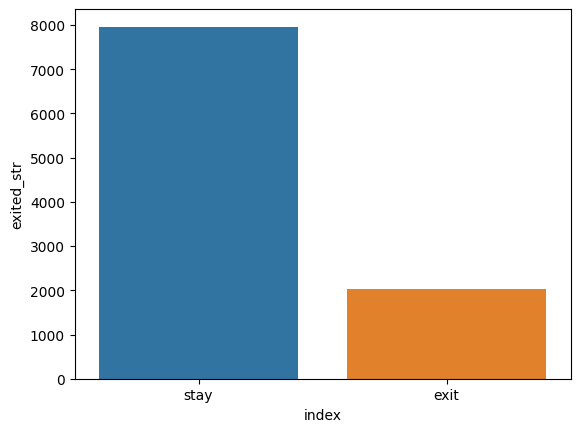

stay    7963
exit    2037
Name: exited_str, dtype: int64


In [23]:
# Jumlah Masing2 target
exited = data['exited_str'].value_counts().reset_index()
sns.barplot(data=exited, x='index', y='exited_str')
plt.show()
print(data['exited_str'].value_counts())

### Bagaimana distribusi data pelanggan berdasarkan Umur?

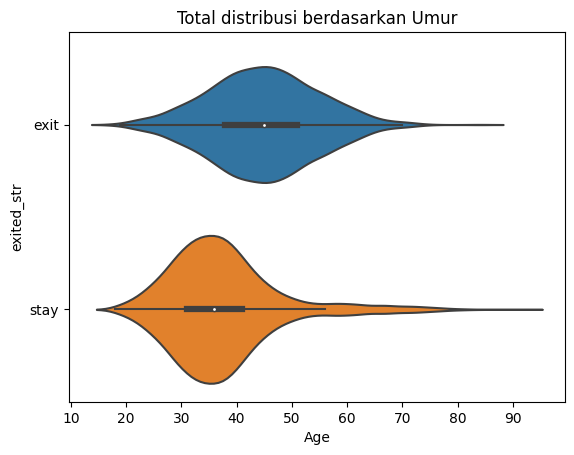

In [24]:
# Melihat distribusi Umur terhadap  yang keluar atau bertahan
sns.violinplot(data=data, x='Age', y='exited_str')
plt.title('Total distribusi berdasarkan Umur')
plt.show()

In [25]:
# Mendapatkan nilai rata-rata, varian dan standar deviasi berdasarkan Umur
data.pivot_table(index='exited_str', values='Age', aggfunc=[np.mean, np.var, np.std])

,mean,var,std
,Age,Age,Age
exited_str,,,
exit,44.837997,95.288084,9.761562
stay,37.408389,102.522974,10.125363


<div class="alert-info">
<b>Note</b>

    
- Rata-rata pelanggan yang berhenti yaitu pada umur 44 Tahun
- Rata-rata pelanggan yang tetap bertahan pada umur 37 tahun yang artinya lebih muda.
- Terdapat pengaruh terhadap data pelanggan yang berhenti dengan umur.
    

</div>

### Bagaimana distribusi data pelanggan berdasarkan Tenure?

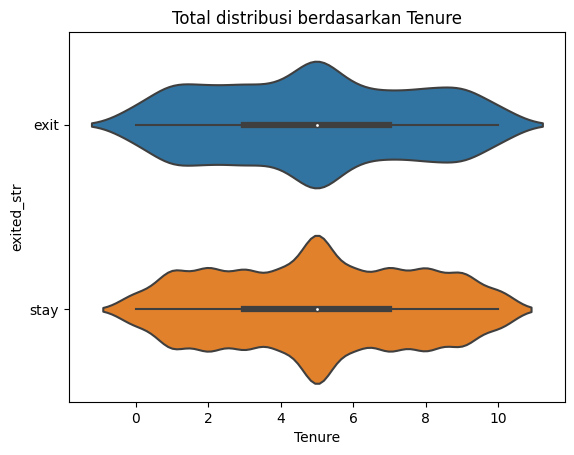

In [26]:
# Melihat distribusi Tenure terhadap yang keluar atau bertahan
sns.violinplot(data=data, x='Tenure', y='exited_str')
plt.title('Total distribusi berdasarkan Tenure')
plt.show()

In [27]:
# Mendapatkan nilai rata-rata, varian dan standar deviasi berdasarkan Tenure
data.pivot_table(index='exited_str', values='Tenure', aggfunc=[np.mean, np.var, np.std])

,mean,var,std
,Tenure,Tenure,Tenure
exited_str,,,
exit,4.910653,7.892799,2.809413
stay,5.020219,7.545811,2.746964


<div class="alert-info">
<b>Note</b>

    
- Penyebaran data waktu tempo pelunasan tergolong merata sehingga dapat dikatakan tidak terdapat hubungan antara Tenure dengan pelanggan yang Churn    

</div>

### Bagaimana distribusi data pelanggan berdasarkan Saldo Rekening ?

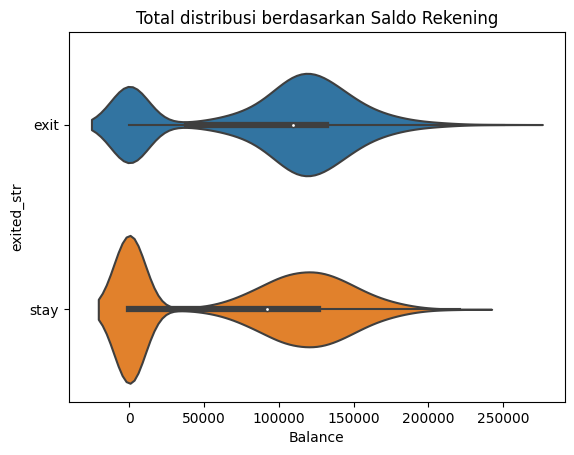

In [28]:
# Melihat distribusi Saldo Rekening terhadap yang keluar atau bertahan
sns.violinplot(data=data, x='Balance', y='exited_str')
plt.title('Total distribusi berdasarkan Saldo Rekening')
plt.show()

In [29]:
# Mendapatkan nilai rata-rata, varian dan standar deviasi berdasarkan Tenure
data.pivot_table(index='exited_str', values='Tenure', aggfunc=[np.mean, np.var, np.std])

,mean,var,std
,Tenure,Tenure,Tenure
exited_str,,,
exit,4.910653,7.892799,2.809413
stay,5.020219,7.545811,2.746964


<div class="alert-info">
<b>Note</b>

    
- Penyebaran antara orang yang berhenti dan bertahan hampir sama.
- Tidak Terdapat pengaruh terhadap data pelanggan yang berhenti dengan saldo Rekening.
    

</div>

### Bagaimana distribusi data pelanggan berdasarkan jumlah produk bank yang digunakan oleh nasabah ?

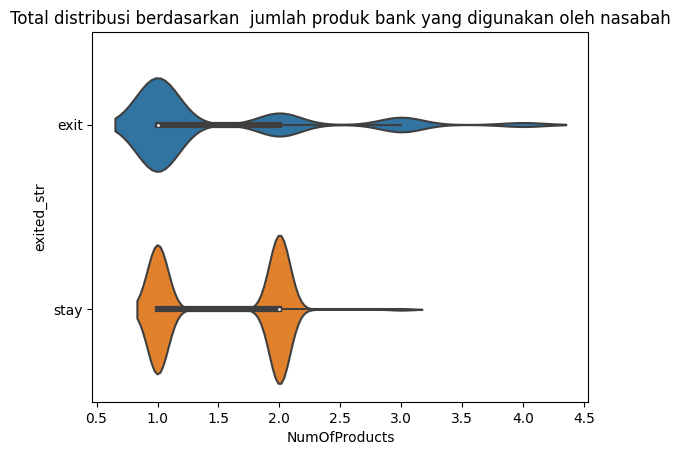

In [30]:
# Melihat distribusi Saldo Rekening terhadap yang keluar atau bertahan
sns.violinplot(data=data, x='NumOfProducts', y='exited_str')
plt.title('Total distribusi berdasarkan  jumlah produk bank yang digunakan oleh nasabah')
plt.show()

In [31]:
# Mendapatkan nilai rata-rata, varian dan standar deviasi berdasarkan jumlah produk bank yang digunakan oleh nasabah
data.pivot_table(index='exited_str', values='NumOfProducts', aggfunc=[np.mean, np.var, np.std])

,mean,var,std
,NumOfProducts,NumOfProducts,NumOfProducts
exited_str,,,
exit,1.475209,0.642435,0.801521
stay,1.544267,0.259626,0.509536


<div class="alert-info">
<b>Note</b>

    
- Pelanggan yang menggunakan lebih dari 2 produk bank cendrung bertahan.
- Pelanggan yang menggunakan 1 atau kurang dari 2 produk cendrung berhenti.

</div>

### Bagaimana distribusi data pelanggan berdasarkan yang memiliki Kartu Kredit ?

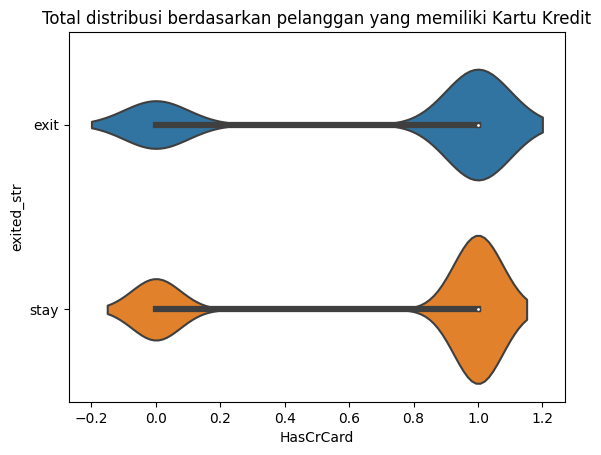

In [32]:
# Melihat distribusi Memiliki Kartu Kredit terhadap yang keluar atau bertahan
sns.violinplot(data=data, x='HasCrCard', y='exited_str')
plt.title('Total distribusi berdasarkan pelanggan yang memiliki Kartu Kredit')
plt.show()

In [33]:
# Mendapatkan nilai rata-rata, varian dan standar deviasi berdasarkan nasabah yang memiliki Kartu Kredit
data.pivot_table(index='exited_str', values='HasCrCard', aggfunc=[np.mean, np.var, np.std])

,mean,var,std
,HasCrCard,HasCrCard,HasCrCard
exited_str,,,
exit,0.699067,0.210476,0.458776
stay,0.707146,0.207117,0.455101


<div class="alert-info">
<b>Note</b>

    
- Penyebaran antara orang yang berhenti dan bertahan hampir sama.
- Tidak Terdapat pengaruh terhadap data pelanggan yang berhenti dengan pelanggan yang memiliki kartu kredit.
    

</div>

### Bagaimana distribusi data pelanggan berdasarkan tingkat ke-aktifan ?

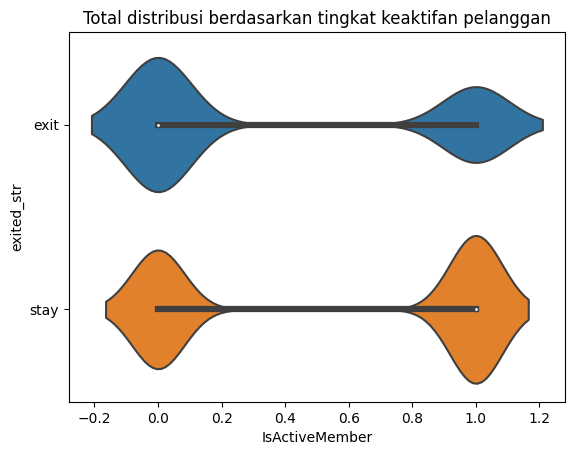

In [34]:
# Melihat distribusi Memiliki Tingkat Keaktifan terhadap yang keluar atau bertahan
sns.violinplot(data=data, x='IsActiveMember', y='exited_str')
plt.title('Total distribusi berdasarkan tingkat keaktifan pelanggan')
plt.show()

In [35]:
# Mendapatkan nilai rata-rata, varian dan standar deviasi berdasarkan tingkat keakfifan nasabah
data.pivot_table(index='exited_str', values='IsActiveMember', aggfunc=[np.mean, np.var, np.std])

,mean,var,std
,IsActiveMember,IsActiveMember,IsActiveMember
exited_str,,,
exit,0.360825,0.230744,0.480358
stay,0.554565,0.247054,0.497045


<div class="alert-info">
<b>Note</b>

    
- Nasabah yang tidak aktif lebih cendrung berhenti bila dibandingkan dengan yang bertahan
    

</div>

<div class="alert-info">
<b>Insight</b>

    
- Kolom yang mempengaruhi pelanggan yang berhenti yaitu : Geography, Gender, Age, NumOfProducts dan IsActiveMember
    

</div>

## data preprocessing

In [36]:
### Hapus kolom yang tidak digunakan dalam pembuatan model
data = data.drop(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Tenure', 'Balance', 'HasCrCard', 'exited_str' ], axis=1)
data.head()

,Geography,Gender,Age,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,France,Female,42,1,1,101348.88,1
1,Spain,Female,41,1,1,112542.58,0
2,France,Female,42,3,0,113931.57,1
3,France,Female,39,2,0,93826.63,0
4,Spain,Female,43,1,1,79084.10,0


## Feature Engineering

In [37]:
# One hot encoding ke data yang memiliki tipe data kategorikal nominal
data = pd.get_dummies(data=data, drop_first=True)

In [38]:
data.head(10)

,Age,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,42,1,1,101348.88,1,0,0,0
1,41,1,1,112542.58,0,0,1,0
2,42,3,0,113931.57,1,0,0,0
3,39,2,0,93826.63,0,0,0,0
4,43,1,1,79084.10,0,0,1,0
5,44,2,0,149756.71,1,0,1,1
6,50,2,1,10062.80,0,0,0,1
7,29,4,0,119346.88,1,1,0,0
8,44,2,1,74940.50,0,0,0,1
9,27,1,1,71725.73,0,0,0,1


### Train Test Split

In [39]:
# Memisahkan Target dengan Feature
X = data.drop(['Exited'], axis=1)
y = data['Exited']

# Memisahkan antara train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [40]:
# Lihat sample
X_train.head()

,Age,NumOfProducts,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5951,41,2,1,61018.85,0,0,1
6630,36,2,1,89804.83,0,0,0
3240,50,1,0,57541.08,0,0,1
5942,53,1,0,54676.10,1,0,1
3789,45,1,1,199256.98,0,1,0


### Create Model

In [41]:
def class_eval(model, X_train, X_test, y_train, y_test):
    # Predict Train
    y_train_pred = model.predict(X_train)

    # Predict Test
    y_test_pred = model.predict(X_test)

    # Show Metrics
    # Confusion Matrix
    cm_tr = confusion_matrix(y_train, y_train_pred)
    cm_te = confusion_matrix(y_test, y_test_pred)

    # Accuracy
    accuracy_tr = (cm_tr[0][0] + cm_tr[1][1]) / (cm_tr[0][0] + cm_tr[1][1] + cm_tr[0][1] + cm_tr[1][0])
    accuracy_te = (cm_te[0][0] + cm_te[1][1]) / (cm_te[0][0] + cm_te[1][1] + cm_te[0][1] + cm_te[1][0])

    # Precision
    precision_tr_1 = cm_tr[1][1] / (cm_tr[1][1] + cm_tr[0][1])
    precision_tr_0 = cm_tr[0][0] / (cm_tr[0][0] + cm_tr[1][0])
    precision_te_1 = cm_te[1][1] / (cm_te[1][1] + cm_te[0][1])
    precision_te_0 = cm_te[0][0] / (cm_te[0][0] + cm_te[1][0])

    # Recall
    recall_tr_1 = cm_tr[1][1] / (cm_tr[1][1] + cm_tr[1][0])
    recall_tr_0 = cm_tr[0][0] / (cm_tr[0][0] + cm_tr[0][1])
    recall_te_1 = cm_te[1][1] / (cm_te[1][1] + cm_te[1][0])
    recall_te_0 = cm_te[0][0] / (cm_te[0][0] + cm_te[0][1])

    # F1 Score
    f1_score_tr_1 = (2 * precision_tr_1 * recall_tr_1) / (precision_tr_1 + recall_tr_1)
    f1_score_tr_0 = (2 * precision_tr_0 * recall_tr_0) / (precision_tr_0 + recall_tr_0)
    f1_score_te_1 = (2 * precision_te_1 * recall_te_1) / (precision_te_1 + recall_te_1)
    f1_score_te_0 = (2 * precision_te_0 * recall_te_0) / (precision_te_0 + recall_te_0)

    # ROC AUC score
    roc_auc_tr = roc_auc_score(y_train, y_train_pred)
    roc_auc_te = roc_auc_score(y_test, y_test_pred)

    # Show Output
    print('----------------Training----------------')
    print('Confusion Matrix')
    print(cm_tr)
    print('Accuracy         :', round(accuracy_tr * 100, 1), '%')
    print('ROC AUC          :', round(roc_auc_tr * 100, 1), '%')
    print('Precision Class 0:', round(precision_tr_0 * 100, 1), '%')
    print('Precision Class 1:', round(precision_tr_1 * 100, 1), '%')
    print('Recall Class 0   :', round(recall_tr_0 * 100, 1), '%')
    print('Recall Class 1   :', round(recall_tr_1 * 100, 1), '%')
    print('F1 Score Class 0 :', round(f1_score_tr_0 * 100, 1), '%')
    print('F1 Score Class 1 :', round(f1_score_tr_1 * 100, 1), '%')

    print('\n----------------Testing----------------')
    print('Confusion Matrix')
    print(cm_te)
    print('Accuracy         :', round(accuracy_te * 100, 1), '%')
    print('ROC AUC          :', round(roc_auc_te * 100, 1), '%')
    print('Precision Class 0:', round(precision_te_0 * 100, 1), '%')
    print('Precision Class 1:', round(precision_te_1 * 100, 1), '%')
    print('Recall Class 0   :', round(recall_te_0 * 100, 1), '%')
    print('Recall Class 1   :', round(recall_te_1 * 100, 1), '%')
    print('F1 Score Class 0 :', round(f1_score_te_0 * 100, 1), '%')
    print('F1 Score Class 1 :', round(f1_score_te_1 * 100, 1), '%')

### Logistic Regression

In [42]:
# Bikin model lr
lr = LogisticRegression(random_state=12345)
# Training Model
lr.fit(X_train, y_train)

LogisticRegression(random_state=12345)

In [43]:
# Evaluasi model lr
class_eval(model=lr, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

----------------Training----------------
Confusion Matrix
[[6399    0]
 [1601    0]]
Accuracy         : 80.0 %
ROC AUC          : 50.0 %
Precision Class 0: 80.0 %
Precision Class 1: nan %
Recall Class 0   : 100.0 %
Recall Class 1   : 0.0 %
F1 Score Class 0 : 88.9 %
F1 Score Class 1 : nan %

----------------Testing----------------
Confusion Matrix
[[1564    0]
 [ 436    0]]
Accuracy         : 78.2 %
ROC AUC          : 50.0 %
Precision Class 0: 78.2 %
Precision Class 1: nan %
Recall Class 0   : 100.0 %
Recall Class 1   : 0.0 %
F1 Score Class 0 : 87.8 %
F1 Score Class 1 : nan %


/tmp/ipykernel_62/504699899.py:18: RuntimeWarning: invalid value encountered in long_scalars
  precision_tr_1 = cm_tr[1][1] / (cm_tr[1][1] + cm_tr[0][1])
/tmp/ipykernel_62/504699899.py:20: RuntimeWarning: invalid value encountered in long_scalars
  precision_te_1 = cm_te[1][1] / (cm_te[1][1] + cm_te[0][1])


<div class="alert-info">
<b>Insight</b>

    
- ROC AUC  cukup rendah yaitu 50% yang artinya sama seperti melempar koin yang kemungkinannya fifty:fifty
    

</div>

### Random Forest hypertuning parameter

In [44]:
# Bikin model rf
rf = RandomForestClassifier(max_depth=9, random_state=12345, n_estimators=1000)
# Training Model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=1000, random_state=12345)

In [45]:
# Evaluasi model rf
class_eval(model=rf, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

----------------Training----------------
Confusion Matrix
[[6290  109]
 [ 837  764]]
Accuracy         : 88.2 %
ROC AUC          : 73.0 %
Precision Class 0: 88.3 %
Precision Class 1: 87.5 %
Recall Class 0   : 98.3 %
Recall Class 1   : 47.7 %
F1 Score Class 0 : 93.0 %
F1 Score Class 1 : 61.8 %

----------------Testing----------------
Confusion Matrix
[[1525   39]
 [ 246  190]]
Accuracy         : 85.8 %
ROC AUC          : 70.5 %
Precision Class 0: 86.1 %
Precision Class 1: 83.0 %
Recall Class 0   : 97.5 %
Recall Class 1   : 43.6 %
F1 Score Class 0 : 91.5 %
F1 Score Class 1 : 57.1 %


<div class="alert-info">
<b>Insight</b>

Pada Random Forest hypertuning parameter, ROC-AUC sudah melebihi 59% dan berada di angka 70%.
    
</div>